Project Name - Restaurant_Insights_and_Predictive_Modeling:_Data-Driven_Decision_Making

Industry - Cognifyz Technologies

Contribution - Individual

Member Name -Adhiraj Karjee

Level - 3

Project Summary  

The final phase of my Data Science internship at Cognifyz Technologies, Level 3, focused on deriving actionable insights and building predictive models using restaurant data. This stage comprised three key components:  

Task 1: Predictive Modeling  
- Developed regression models to forecast aggregate restaurant ratings.  
- Implemented train-test splits and systematically evaluated model performance.  
- Experimented with multiple algorithms, including linear regression, decision trees, and random forests, to identify the most effective approach.  

 Task 2: Customer Preference Analysis  
- Investigated the relationship between cuisine types and restaurant ratings.  
- Identified the most popular cuisines based on customer votes and preferences.  
- Highlighted specific cuisines that consistently achieve higher ratings, uncovering trends in customer satisfaction.  

 Task 3: Data Visualization 
- Designed insightful visualizations showcasing rating distributions using diverse chart types.  
- Compared average ratings across various cuisines and cities to spot patterns and outliers.  
- Explored feature-target relationships through targeted visualizations, offering deeper analytical insights.  

This phase represents a culmination of predictive analytics and visualization techniques, providing a robust framework for understanding customer preferences and improving rating prediction accuracy.

Task 1: Predictive Modeling

In [32]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Suppress warnings to keep the output clean
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\INTERNSHIP\COGNIFYZ.csv")

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Has Table booking', 'Has Online delivery'], drop_first=True)

# Select the relevant features and target variable for model training
X = df[['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes']]
y = df['Aggregate rating']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a dictionary of regression models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

# Iterate over each model, train it, make predictions, and evaluate its performance
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model on training data
    
    y_pred = model.predict(X_test)  # Make predictions on test data
    
    # Calculate evaluation metrics: Mean Squared Error and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display the performance metrics for each model
    print(f"{model_name} - Performance:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print("-" * 30)


Linear Regression - Performance:
Mean Squared Error: 1.6765
R-squared: 0.2634
------------------------------
Decision Tree Regressor - Performance:
Mean Squared Error: 0.2067
R-squared: 0.9092
------------------------------
Random Forest Regressor - Performance:
Mean Squared Error: 0.1340
R-squared: 0.9411
------------------------------


Task 2: Customer Preference Analysis

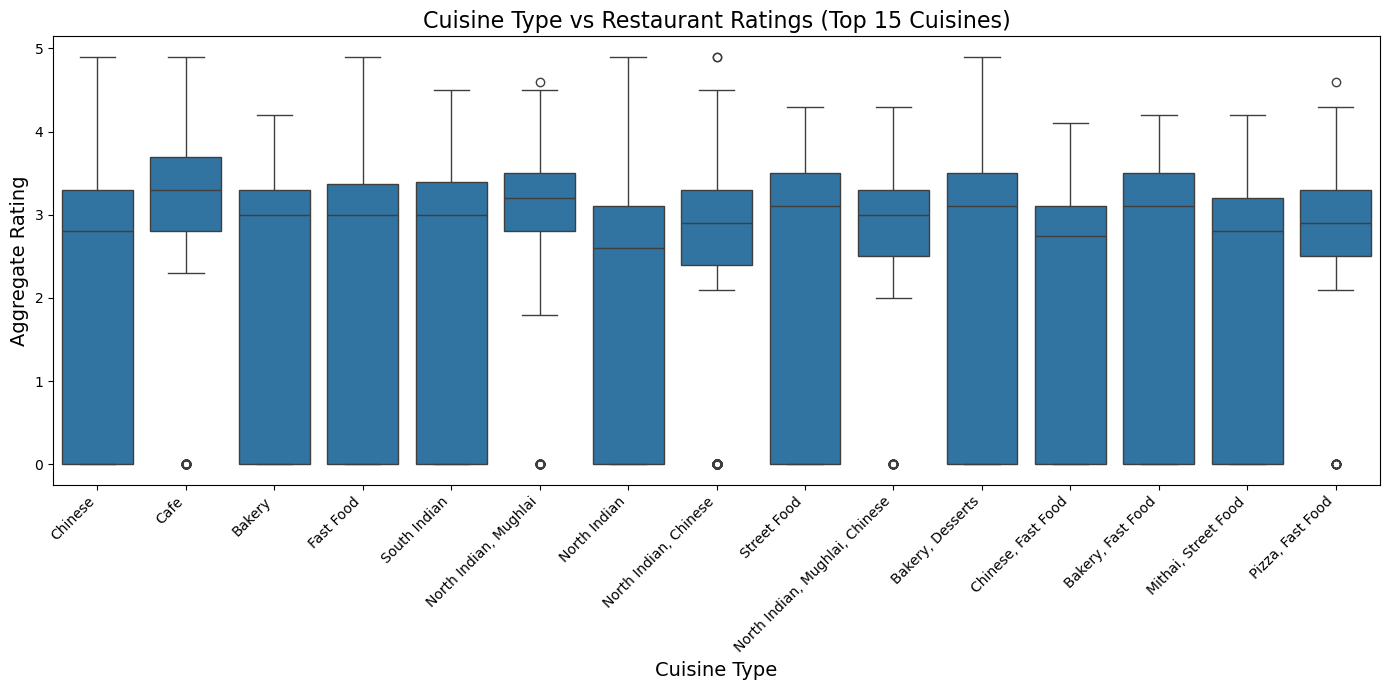

In [34]:
# Analyzing the relationship between the type of cuisine and restaurant ratings
# Select the top 15 most frequent cuisines
top_cuisines = df['Cuisines'].value_counts().nlargest(15).index

# Filter the dataset to include only rows with the top 15 cuisines
filtered_df = df[df['Cuisines'].isin(top_cuisines)]

# Create a box plot to visualize the ratings distribution by cuisine type
plt.figure(figsize=(14, 7))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=filtered_df)

# Set the plot title and labels
plt.title('Cuisine Type vs Restaurant Ratings (Top 15 Cuisines)', fontsize=16)
plt.xlabel('Cuisine Type', fontsize=14)
plt.ylabel('Aggregate Rating', fontsize=14)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


In [36]:
# Identifying the top 10 cuisines based on the total number of votes
top_cuisines_by_votes = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)

# Display the result
print("Top 10 Cuisines by Total Number of Votes:")
print(top_cuisines_by_votes)


Top 10 Cuisines by Total Number of Votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


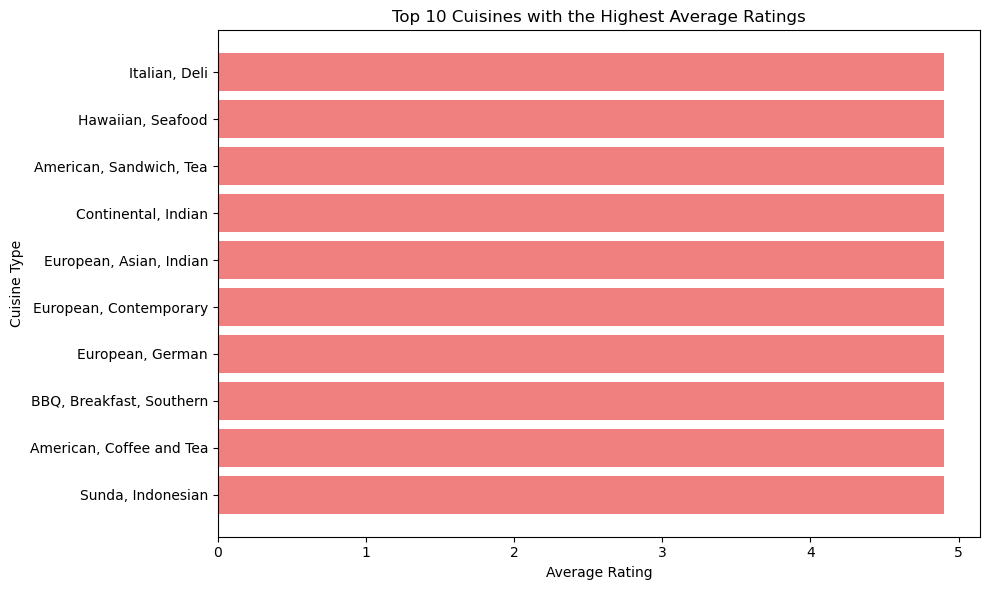

In [38]:
# Group the data by cuisine and calculate the average rating for each cuisine
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort cuisines by average rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Select the top 10 cuisines with the highest average ratings
top_cuisines = cuisine_ratings.head(10)

# Horizontal bar plot visualization for the top 10 cuisines with highest ratings
plt.figure(figsize=(10, 6))
plt.barh(top_cuisines['Cuisines'], top_cuisines['Aggregate rating'], color='lightcoral')

# Set labels and title
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Cuisines with the Highest Average Ratings')

# Reverse y-axis to display the highest rating at the top
plt.gca().invert_yaxis()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()



Task 3: Data Visualization

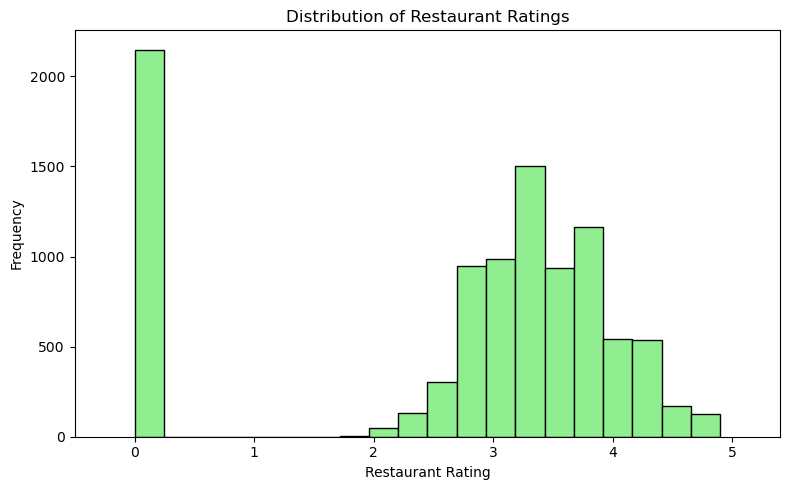

In [40]:
# Distribution of ratings using a histogram
plt.figure(figsize=(8, 5))

# Plot the histogram with improved styling
plt.hist(df['Aggregate rating'], bins=20, color='lightgreen', edgecolor='black')

# Add labels and title
plt.xlabel('Restaurant Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ratings')

# Adjust the x-axis range for better readability
plt.xlim(df['Aggregate rating'].min() - 0.5, df['Aggregate rating'].max() + 0.5)

# Display the chart with improved visual spacing
plt.tight_layout()

# Show the plot
plt.show()



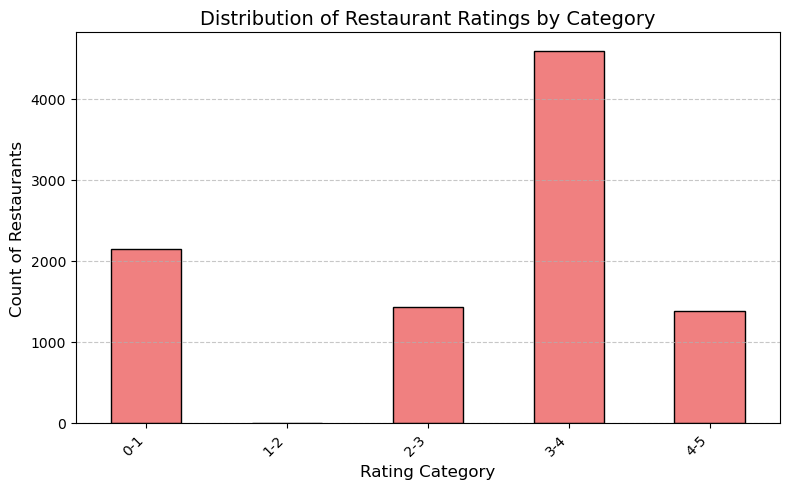

In [42]:
# Distribution of ratings using a bar plot
# Group ratings into categories (e.g., 0-1, 1-2, 2-3, etc.)
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
df['Rating Category'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels, right=False)

# Count the number of restaurants in each rating category
rating_counts = df['Rating Category'].value_counts().sort_index()

# Create a bar plot with improved styling
plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar', color='lightcoral', edgecolor='black')

# Add labels and title
plt.xlabel('Rating Category', fontsize=12)
plt.ylabel('Count of Restaurants', fontsize=12)
plt.title('Distribution of Restaurant Ratings by Category', fontsize=14)

# Adjust x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display chart with improved layout
plt.tight_layout()

# Show the plot
plt.show()


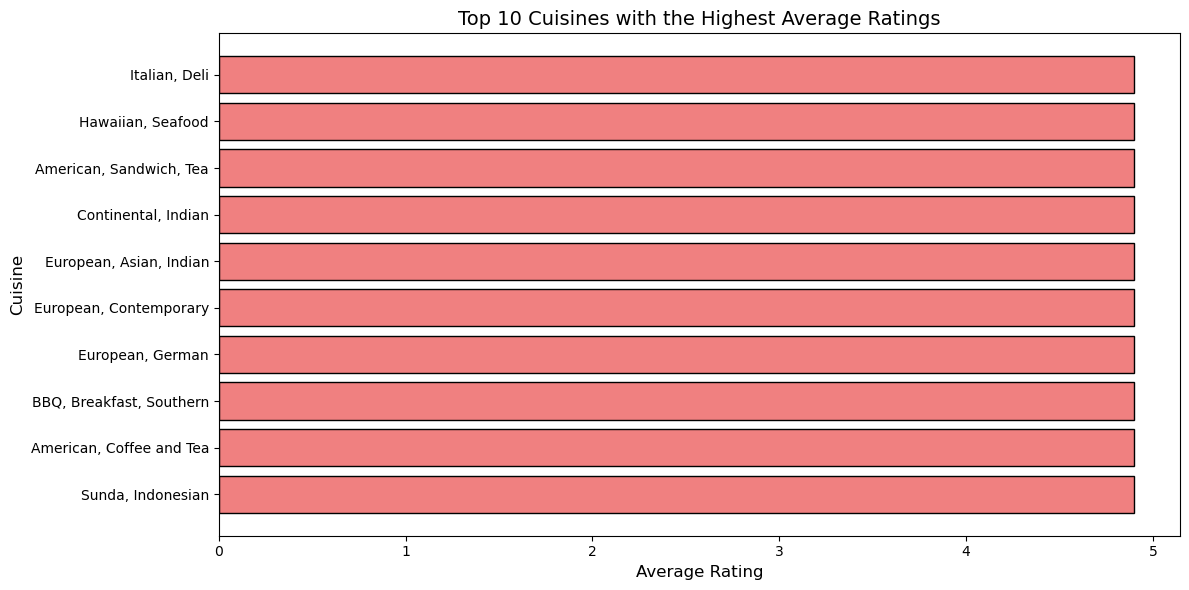

In [44]:
# Comparing average ratings of different cuisines using a horizontal bar plot
# Group the data by cuisine and calculate the mean rating for each cuisine
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort cuisines by average rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Select the top 10 cuisines with the highest ratings
top_cuisines = cuisine_ratings.head(10)

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
plt.barh(top_cuisines['Cuisines'], top_cuisines['Aggregate rating'], color='lightcoral', edgecolor='black')

# Add labels and title with improved font size
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)
plt.title('Top 10 Cuisines with the Highest Average Ratings', fontsize=14)

# Invert the y-axis to display the highest ratings at the top
plt.gca().invert_yaxis()

# Adjust layout to avoid clipping and ensure readability
plt.tight_layout()

# Display the chart
plt.show()



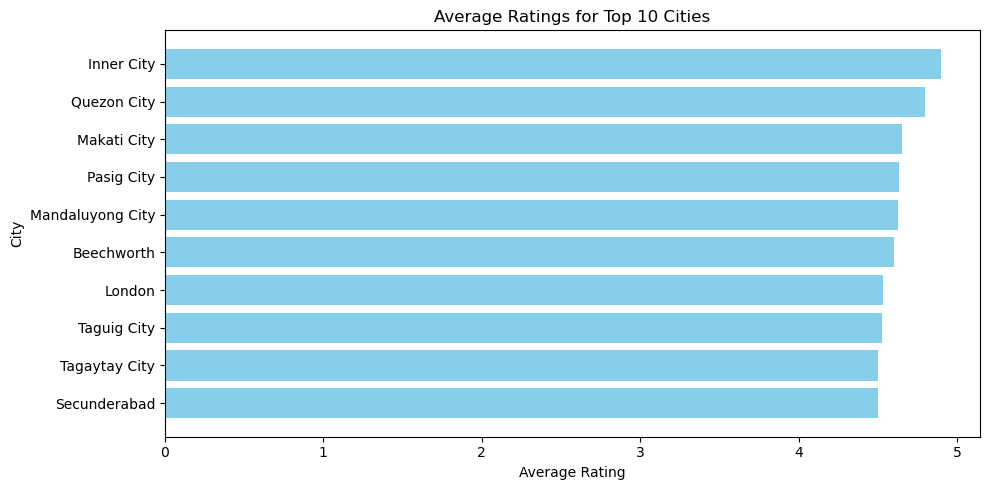

In [46]:
# Comparing average ratings of different cities by using a bar plot
# Group the data by city and calculate the average rating for each city
city_ratings = df.groupby('City')['Aggregate rating'].mean().reset_index()

# Sort by average rating in descending order
city_ratings = city_ratings.sort_values(by='Aggregate rating', ascending=False)

# Count Plot Visualization Code for the cities with the highest ratings
plt.figure(figsize=(10, 5))
plt.barh(city_ratings['City'][:10], city_ratings['Aggregate rating'][:10], color='skyblue')

# Add labels and title
plt.ylabel('City')
plt.xlabel('Average Rating')
plt.title(f'Average Ratings for Top 10 Cities')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()

# Display Chart
plt.show()
     

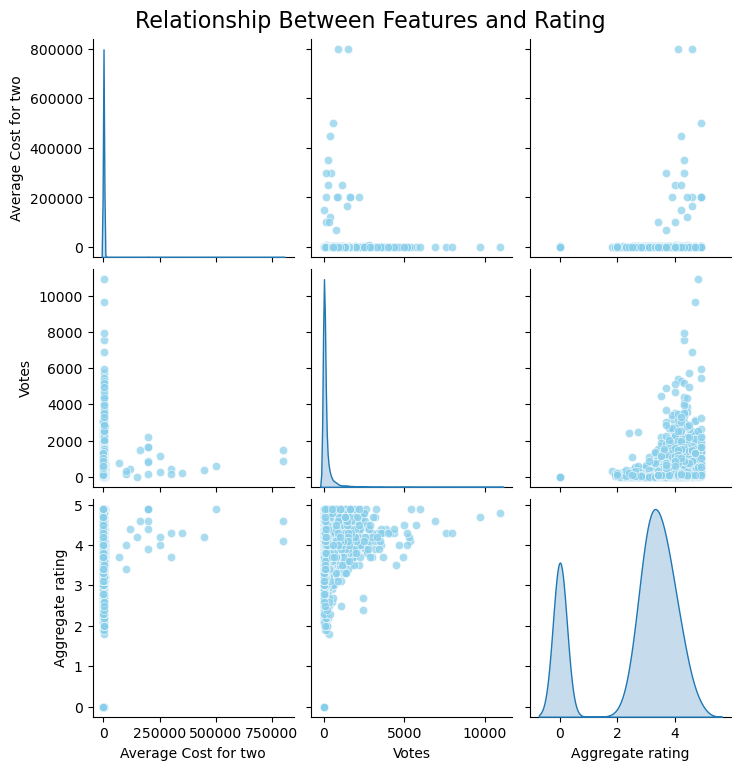

In [48]:
# Visualizing the relationship between various features and the target variable using pairplot
sns.pairplot(df, vars=['Average Cost for two', 'Votes', 'Aggregate rating'], 
             diag_kind='kde', # Use KDE (Kernel Density Estimate) on the diagonal for smoother distributions
             plot_kws={'alpha': 0.7, 'color': 'skyblue'}, # Adjust transparency and color for better visualization
             height=2.5) # Set size for each plot for better clarity

# Add a title to the pairplot
plt.suptitle("Relationship Between Features and Rating", y=1.02, fontsize=16)

# Display the plot
plt.show()

